In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("computingvictor/transactions-fraud-datasets")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/transactions-fraud-datasets


In [3]:
cards_data = pd.read_csv(f"{path}/cards_data.csv")
users_data = pd.read_csv(f"{path}/users_data.csv")
transactions_data = pd.read_csv(f"{path}/transactions_data.csv")
mcc_codes = pd.read_json(f"{path}/mcc_codes.json",typ='series').reset_index().rename(columns={'index':'mcc_code',0:'mcc_description'})
fraud_label_target = pd.read_json(f"{path}/train_fraud_labels.json").reset_index().rename(columns={'index':'transaction_id',0:'fraud'})

In [4]:
def get_data_card(df):
  print(f"Shape of give data is {df.shape}")
  print(f"\n Count of duplicate Values is {df.duplicated().sum()}")
  print(f"\n Null Values  ====> \n")
  print(df.isna().sum())
  print("\n Information about Data ==>\n")
  print(df.info())

In [5]:
cards_data.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [6]:
get_data_card(cards_data)

Shape of give data is (6146, 13)

 Count of duplicate Values is 0

 Null Values  ====> 

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

 Information about Data ==>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6

In [7]:
cards_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [8]:
cards_data["card_on_dark_web"].value_counts()

card_on_dark_web
No    6146
Name: count, dtype: int64

In [9]:
get_data_card(users_data)

Shape of give data is (2000, 14)

 Count of duplicate Values is 0

 Null Values  ====> 

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

 Information about Data ==>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   la

In [10]:
users_data['per_capita_income'] = users_data['per_capita_income'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)
users_data['yearly_income'] = users_data['yearly_income'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)
users_data['total_debt'] = users_data['total_debt'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)

In [11]:
get_data_card(mcc_codes)

Shape of give data is (109, 2)

 Count of duplicate Values is 0

 Null Values  ====> 

mcc_code           0
mcc_description    0
dtype: int64

 Information about Data ==>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mcc_code         109 non-null    int64 
 1   mcc_description  109 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


In [12]:
mcc_codes["mcc_code"]  = mcc_codes["mcc_code"].astype(int)

In [13]:
get_data_card(fraud_label_target)

Shape of give data is (8914963, 2)

 Count of duplicate Values is 0

 Null Values  ====> 

transaction_id    0
target            0
dtype: int64

 Information about Data ==>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   transaction_id  int64 
 1   target          object
dtypes: int64(1), object(1)
memory usage: 136.0+ MB
None


In [14]:
get_data_card(transactions_data)

Shape of give data is (13305915, 12)

 Count of duplicate Values is 0

 Null Values  ====> 

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

 Information about Data ==>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1),

In [15]:
transactions_data['amount'] = transactions_data['amount'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)


In [16]:
transactions_data.date = pd.to_datetime(transactions_data.date)
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          float64       
 5   use_chip        object        
 6   merchant_id     int64         
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             float64       
 10  mcc             int64         
 11  errors          object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.2+ GB


In [17]:
transaction_fraud = transactions_data.merge(fraud_label_target,how='left',left_on='id',right_on='transaction_id')
transaction_fraud.drop("id",inplace = True,axis=1)

In [18]:
transaction_fraud

,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,transaction_id,target
0,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,7475327.0,No
1,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,7475328.0,No
2,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,7475329.0,No
3,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN,NaN,NaN
4,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,7475332.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN,23761868.0,No
13305911,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN,23761869.0,No
13305912,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN,23761870.0,No
13305913,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN,NaN,NaN


In [19]:
transaction_fraud_card = transaction_fraud.merge(cards_data[['id','card_brand','card_type','expires','has_chip','num_cards_issued','credit_limit','acct_open_date','year_pin_last_changed']],how='left',left_on='card_id', right_on='id')
transaction_fraud_card.drop('id',inplace=True,axis =1)

In [20]:
transaction_fraud_card

,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,...,transaction_id,target,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed
0,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,...,7475327.0,No,Mastercard,Debit (Prepaid),07/2022,YES,2,$55,05/2008,2008
1,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,...,7475328.0,No,Mastercard,Credit,12/2024,YES,1,$9100,09/2005,2015
2,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,...,7475329.0,No,Mastercard,Debit,05/2020,YES,1,$14802,01/2006,2008
3,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,...,NaN,NaN,Mastercard,Debit,10/2024,NO,2,$37634,05/2004,2006
4,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,...,7475332.0,No,Visa,Debit,01/2020,YES,1,$19113,07/2009,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,...,23761868.0,No,Mastercard,Debit,02/2020,YES,1,$26743,03/2019,2019
13305911,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,...,23761869.0,No,Mastercard,Debit,06/2024,YES,1,$5141,03/2004,2012
13305912,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,...,23761870.0,No,Mastercard,Debit,06/2021,YES,1,$17686,02/2004,2007
13305913,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,...,NaN,NaN,Visa,Debit,11/2021,YES,2,$14036,11/2005,2010


In [21]:
transaction_fraud_card_users = transaction_fraud_card.merge(users_data[['id','current_age','retirement_age','birth_year','birth_month','gender','per_capita_income','yearly_income','total_debt','credit_score','num_credit_cards']],how='left',left_on='client_id', right_on='id')
transaction_fraud_card_users.drop('id',inplace=True,axis =1)

In [22]:
main_df = transaction_fraud_card_users.merge(mcc_codes,how='left',left_on='mcc', right_on='mcc_code')
main_df.drop('mcc_code',inplace=True,axis=1)

In [23]:
main_df

,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,...,retirement_age,birth_year,birth_month,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,mcc_description
0,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,...,67,1989,7,Female,23679.0,48277.0,110153.0,740,4,Miscellaneous Food Stores
1,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,...,67,1971,6,Male,18076.0,36853.0,112139.0,834,5,Department Stores
2,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,...,65,1970,4,Male,16894.0,34449.0,36540.0,686,3,Money Transfer
3,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,...,67,1967,5,Female,26168.0,53350.0,128676.0,685,5,Money Transfer
4,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,...,69,1968,5,Male,33529.0,68362.0,96182.0,711,2,Drinking Places (Alcoholic Beverages)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,...,67,1938,11,Female,22681.0,33483.0,196.0,698,5,Miscellaneous Food Stores
13305911,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,...,66,1957,9,Male,9995.0,20377.0,12092.0,789,4,"Digital Goods - Media, Books, Apps"
13305912,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,...,67,1952,4,Female,32580.0,78329.0,40161.0,720,3,"Utilities - Electric, Gas, Water, Sanitary"
13305913,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,...,69,1975,12,Female,23752.0,48430.0,62384.0,716,2,"Grocery Stores, Supermarkets"


In [24]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 32 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   date                   datetime64[ns]
 1   client_id              int64         
 2   card_id                int64         
 3   amount                 float64       
 4   use_chip               object        
 5   merchant_id            int64         
 6   merchant_city          object        
 7   merchant_state         object        
 8   zip                    float64       
 9   mcc                    int64         
 10  errors                 object        
 11  transaction_id         float64       
 12  target                 object        
 13  card_brand             object        
 14  card_type              object        
 15  expires                object        
 16  has_chip               object        
 17  num_cards_issued       int64         
 18  credit_limit        

In [25]:
main_df.target.isna().sum()

4390952

In [26]:
test_df = main_df[main_df["target"].isna()]
final_df = main_df[main_df["target"].notna()]

In [27]:
transaction_fraud_yes = final_df[final_df["target"]=="Yes"]

transaction_fraud_no = final_df[final_df["target"]=="No"]

In [28]:
transaction_fraud_yes["gender"].value_counts(normalize=True)*100

gender
Female    52.370237
Male      47.629763
Name: proportion, dtype: float64

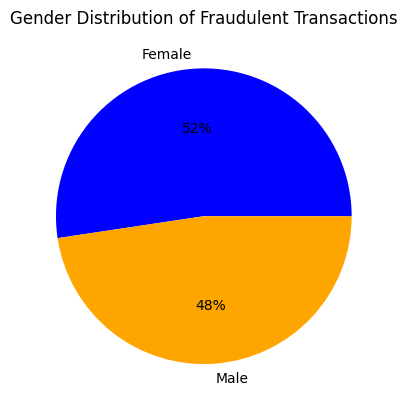

In [29]:
labels = transaction_fraud_yes["gender"].value_counts().index.tolist()
data = transaction_fraud_yes["gender"].value_counts().values
plt.pie(data,labels=labels,colors=["blue","orange"],autopct='%.0f%%')
plt.title("Gender Distribution of Fraudulent Transactions")
plt.show()

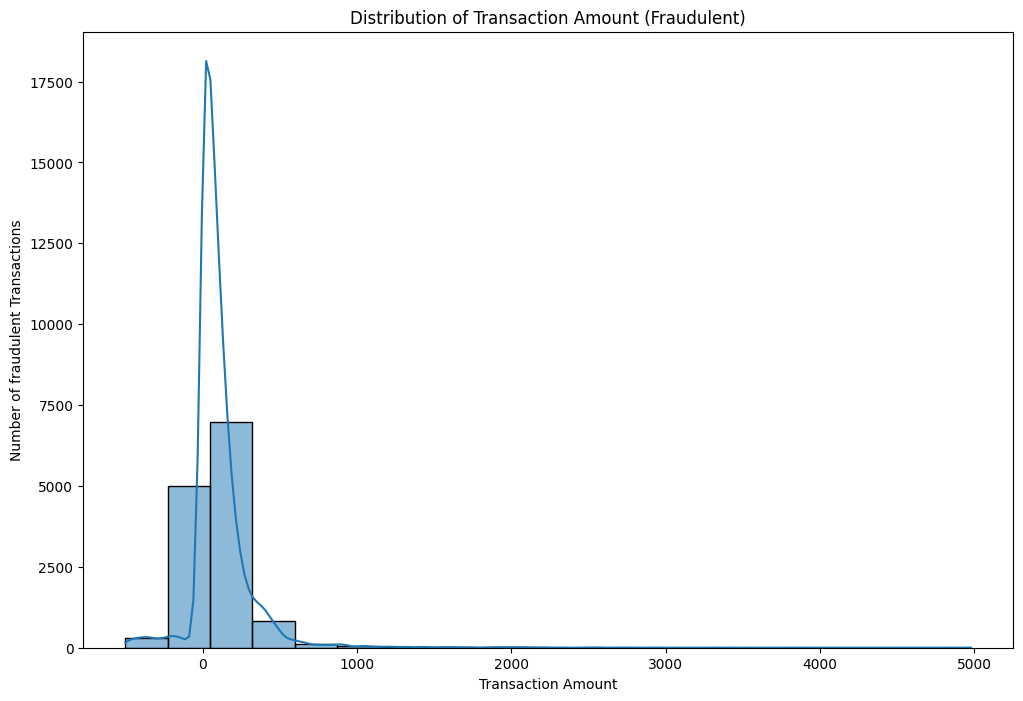

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(data=transaction_fraud_yes,x="amount",bins=20,kde=True)
plt.title("Distribution of Transaction Amount (Fraudulent)")
plt.xlabel("Transaction Amount")
plt.ylabel("Number of fraudulent Transactions")
plt.show()

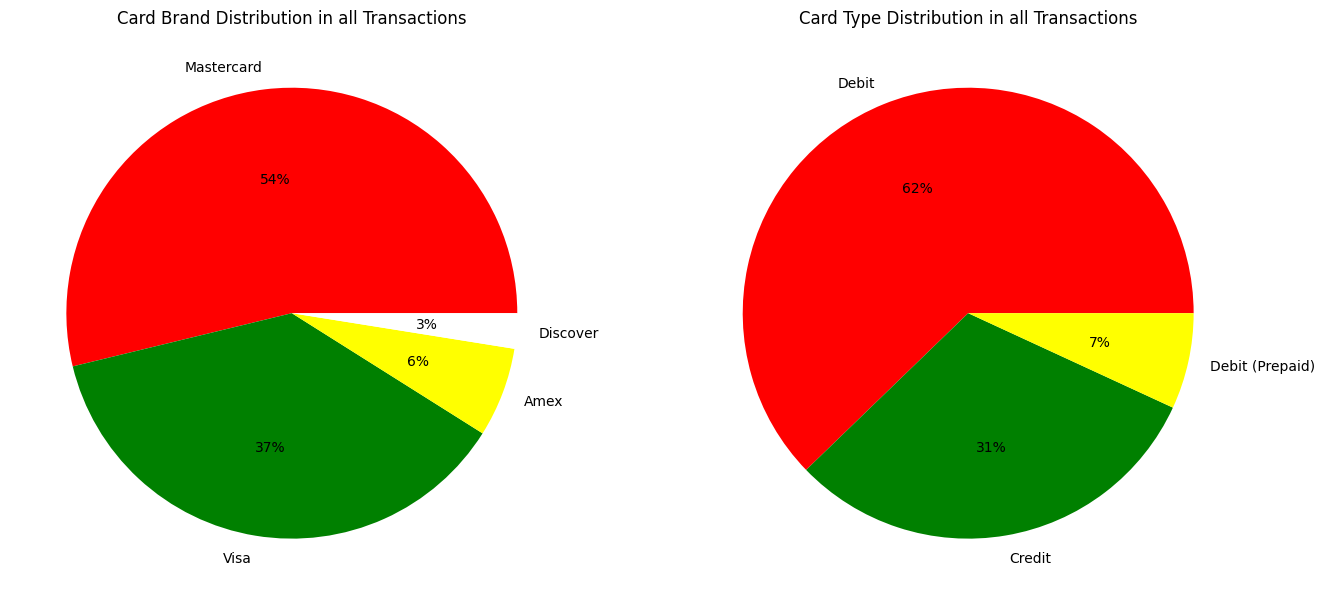

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

labels = final_df.card_brand.value_counts().index.tolist()
data = final_df.card_brand.value_counts().values
ax[0].pie(data, labels=labels, colors=['red','green','yellow','white'], autopct='%.0f%%')
ax[0].set_title('Card Brand Distribution in all Transactions')


labels = final_df.card_type.value_counts().index.tolist()
data = final_df.card_type.value_counts().values
ax[1].pie(data, labels=labels, colors=['red','green','yellow'], autopct='%.0f%%')
ax[1].set_title('Card Type Distribution in all Transactions')

plt.show()

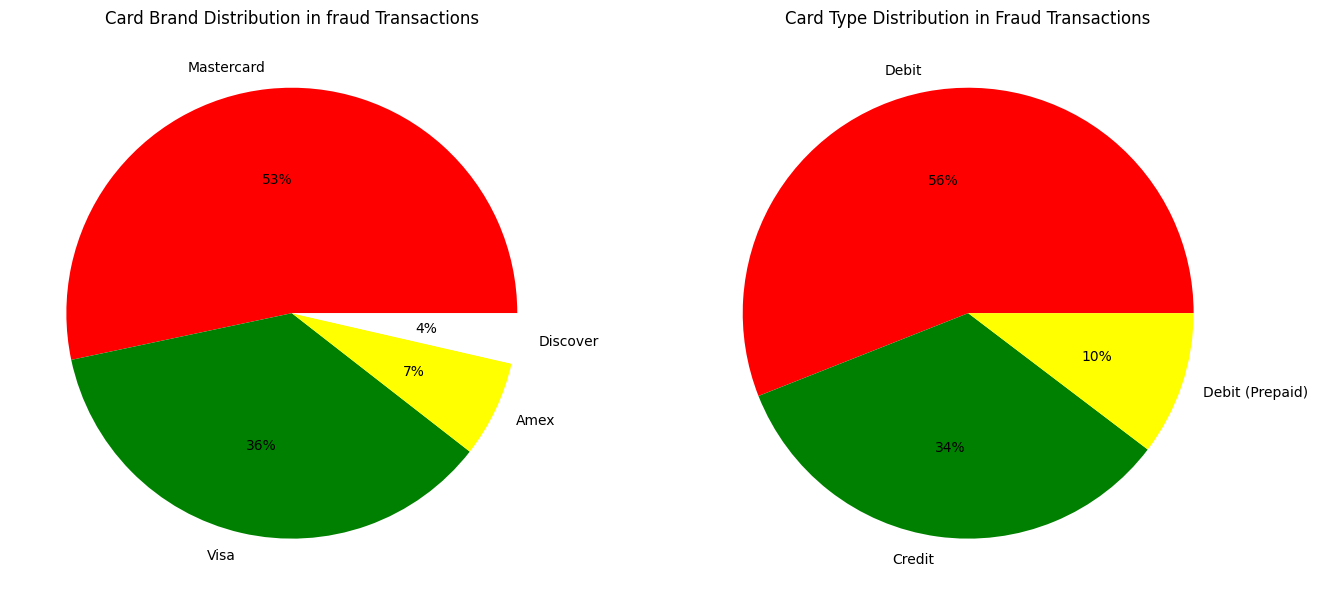

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

labels = transaction_fraud_yes.card_brand.value_counts().index.tolist()
data = transaction_fraud_yes.card_brand.value_counts().values
ax[0].pie(data, labels=labels, colors=['red','green','yellow','white'], autopct='%.0f%%')
ax[0].set_title('Card Brand Distribution in fraud Transactions')


labels = transaction_fraud_yes.card_type.value_counts().index.tolist()
data = transaction_fraud_yes.card_type.value_counts().values
ax[1].pie(data, labels=labels, colors=['red','green','yellow'], autopct='%.0f%%')
ax[1].set_title('Card Type Distribution in Fraud Transactions')

plt.show()

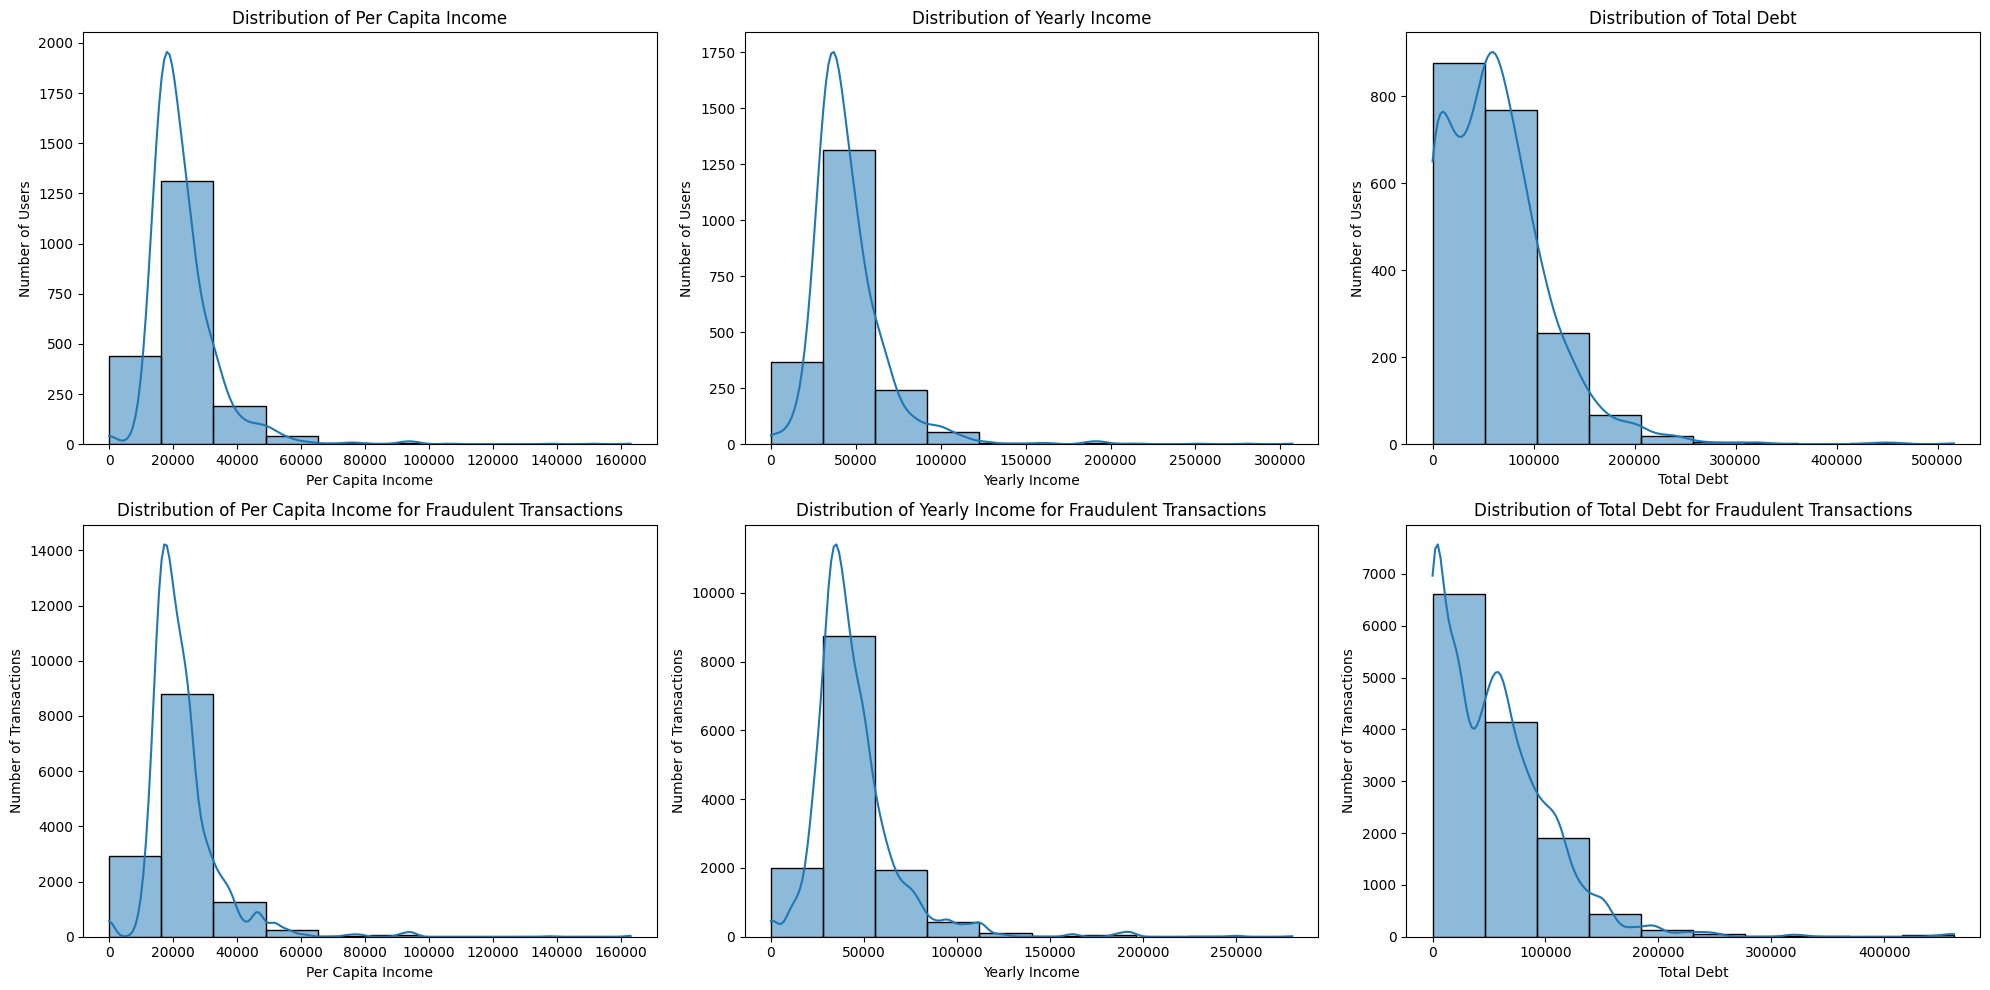

In [33]:
fig, ax = plt.subplots(2,3, figsize = (20,10))

sns.histplot(data=users_data, x='per_capita_income', bins=10, kde=True,ax=ax[0,0])
ax[0,0].set_title("Distribution of Per Capita Income")
ax[0,0].set_xlabel("Per Capita Income")
ax[0,0].set_ylabel("Number of Users")

sns.histplot(data=users_data, x='yearly_income', bins=10, kde=True,ax=ax[0,1])
ax[0,1].set_title("Distribution of Yearly Income")
ax[0,1].set_xlabel("Yearly Income")
ax[0,1].set_ylabel("Number of Users")

sns.histplot(data=users_data, x='total_debt', bins=10, kde=True,ax=ax[0,2])
ax[0,2].set_title("Distribution of Total Debt")
ax[0,2].set_xlabel("Total Debt")
ax[0,2].set_ylabel("Number of Users")

sns.histplot(data=transaction_fraud_yes, x='per_capita_income', bins=10, kde=True,ax=ax[1,0])
ax[1,0].set_title("Distribution of Per Capita Income for Fraudulent Transactions")
ax[1,0].set_xlabel("Per Capita Income")
ax[1,0].set_ylabel("Number of Transactions")

sns.histplot(data=transaction_fraud_yes, x='yearly_income', bins=10, kde=True,ax=ax[1,1])
ax[1,1].set_title("Distribution of Yearly Income for Fraudulent Transactions")
ax[1,1].set_xlabel("Yearly Income")
ax[1,1].set_ylabel("Number of Transactions")

sns.histplot(data=transaction_fraud_yes, x='total_debt', bins=10, kde=True,ax=ax[1,2])
ax[1,2].set_title("Distribution of Total Debt for Fraudulent Transactions")
ax[1,2].set_xlabel("Total Debt")
ax[1,2].set_ylabel("Number of Transactions")

plt.tight_layout()
plt.show()


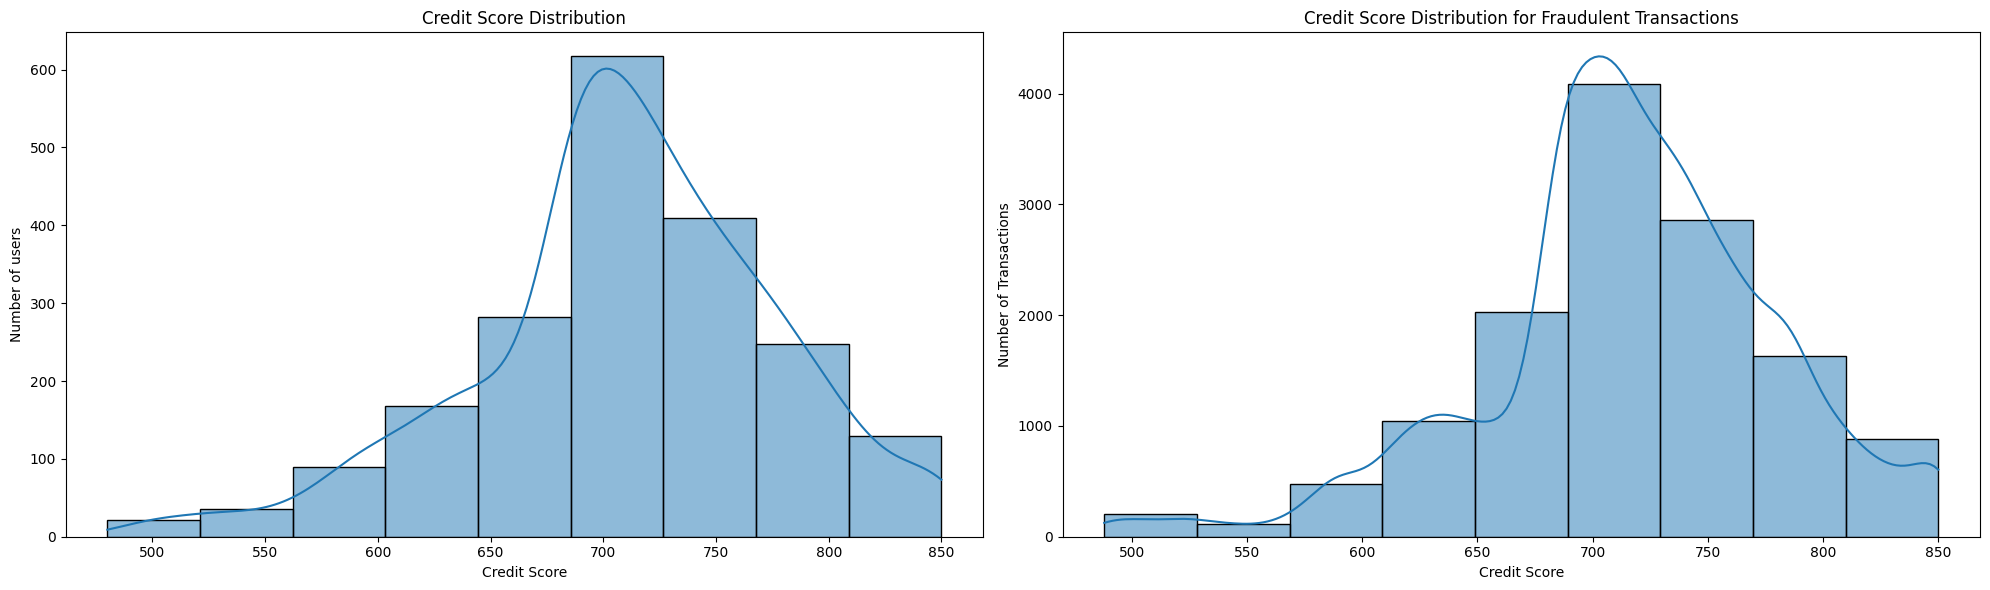

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=users_data, x='credit_score', bins=9, kde=True,ax=ax[0])
ax[0].set_title("Credit Score Distribution")
ax[0].set_xlabel("Credit Score")
ax[0].set_ylabel("Number of users")

sns.histplot(data=transaction_fraud_yes, x='credit_score', bins=9, kde=True,ax=ax[1])
ax[1].set_title("Credit Score Distribution for Fraudulent Transactions")
ax[1].set_xlabel("Credit Score")
ax[1].set_ylabel("Number of Transactions")

plt.tight_layout()
plt.show()

In [35]:
transaction_fraud_yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13332 entries, 3459 to 13289605
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   13332 non-null  datetime64[ns]
 1   client_id              13332 non-null  int64         
 2   card_id                13332 non-null  int64         
 3   amount                 13332 non-null  float64       
 4   use_chip               13332 non-null  object        
 5   merchant_id            13332 non-null  int64         
 6   merchant_city          13332 non-null  object        
 7   merchant_state         4553 non-null   object        
 8   zip                    1234 non-null   float64       
 9   mcc                    13332 non-null  int64         
 10  errors                 569 non-null    object        
 11  transaction_id         13332 non-null  float64       
 12  target                 13332 non-null  object        
 13  

In [36]:
date_fraud_df = transaction_fraud_yes.copy()

date_fraud_df['hour'] = date_fraud_df['date'].dt.hour

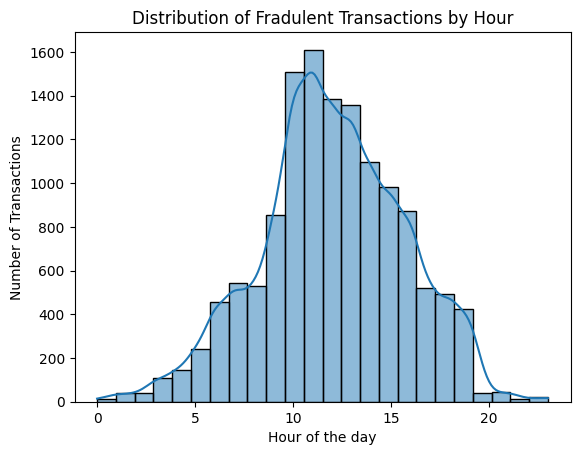

In [37]:
sns.histplot(data = date_fraud_df,x='hour',bins=24,kde = True)
plt.title("Distribution of Fradulent Transactions by Hour")
plt.xlabel("Hour of the day")
plt.ylabel("Number of Transactions")
plt.show()

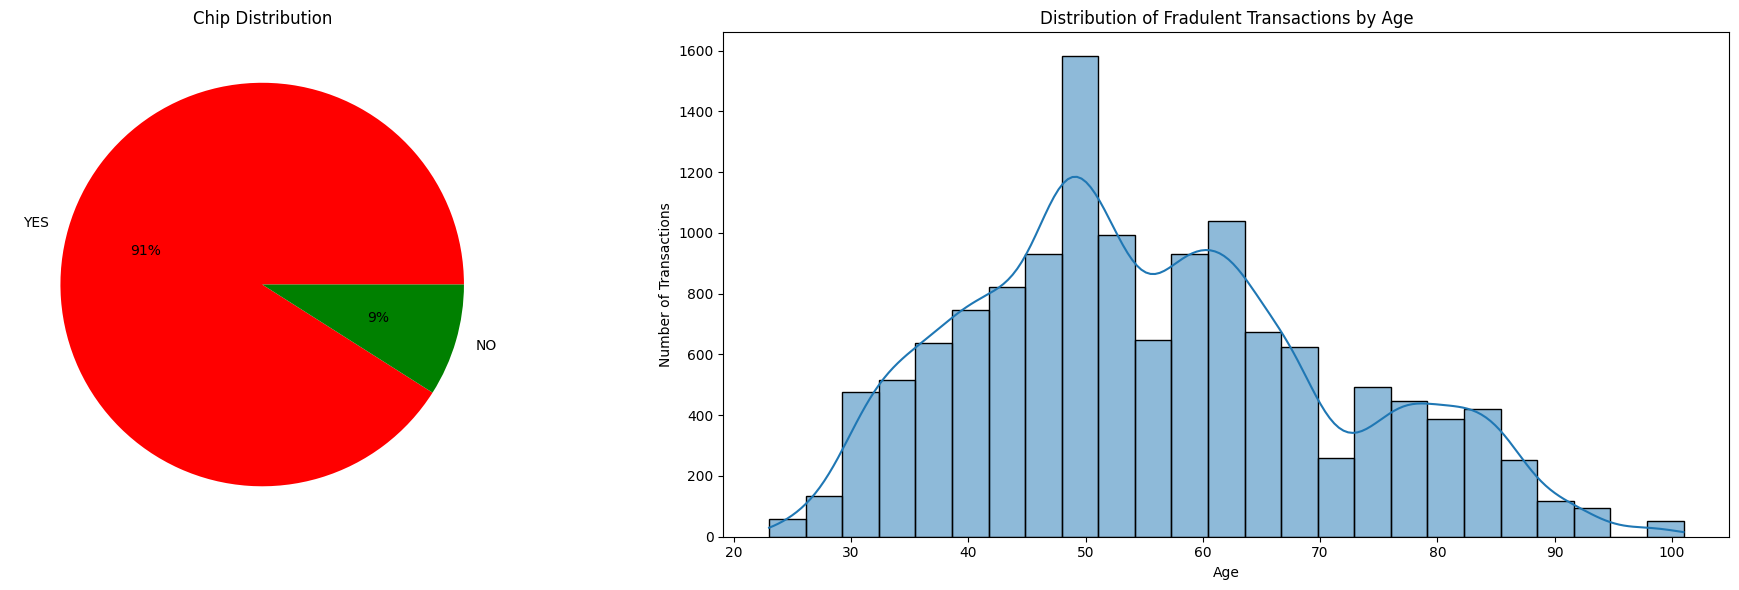

In [38]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

labels = transaction_fraud_yes.has_chip.value_counts().index.tolist()
data = transaction_fraud_yes.has_chip.value_counts().values
ax[0].pie(data, labels=labels, colors=['red','green'], autopct='%.0f%%')
ax[0].set_title('Chip Distribution')

sns.histplot(data= date_fraud_df, x='current_age',bins = 25,kde = True)
ax[1].set_title("Distribution of Fradulent Transactions by Age")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Number of Transactions")

plt.tight_layout()
plt.show()

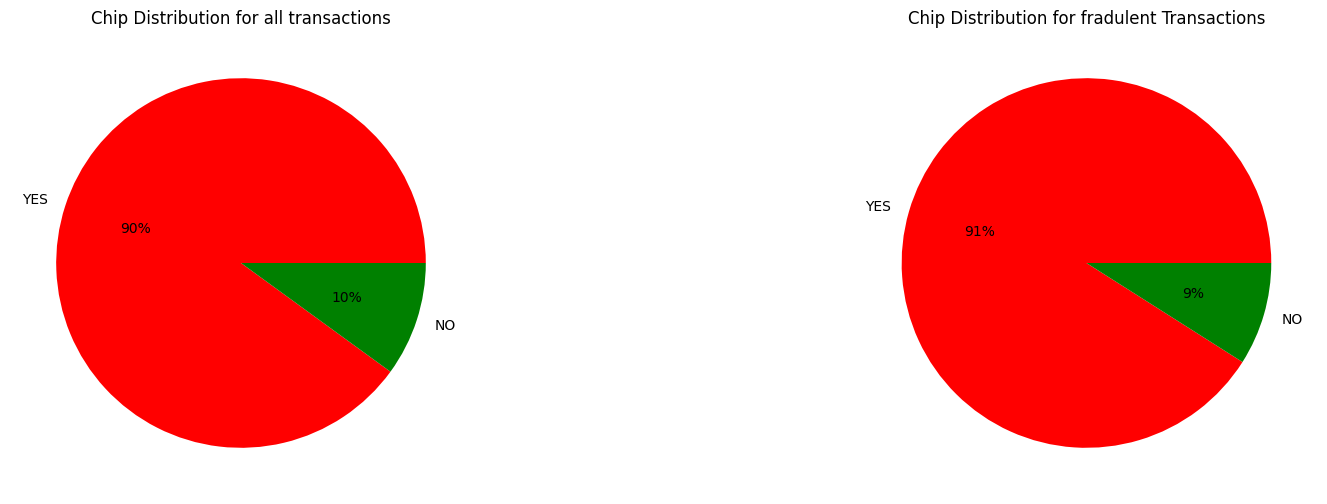

In [39]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))

labels = final_df["has_chip"].value_counts().index.tolist()
data = final_df["has_chip"].value_counts().values
ax[0].pie(data, labels=labels, colors=['red','green'], autopct='%.0f%%')
ax[0].set_title('Chip Distribution for all transactions')

labels = transaction_fraud_yes.has_chip.value_counts().index.tolist()
data = transaction_fraud_yes.has_chip.value_counts().values
ax[1].pie(data, labels=labels, colors=['red','green'], autopct='%.0f%%')
ax[1].set_title('Chip Distribution for fradulent Transactions')

plt.show()




In [40]:
final_df.errors.value_counts()

errors
Insufficient Balance                                   87686
Bad PIN                                                21488
Technical Glitch                                       17776
Bad Card Number                                         5235
Bad CVV                                                 4091
Bad Expiration                                          4086
Bad Zipcode                                              767
Bad PIN,Insufficient Balance                             198
Insufficient Balance,Technical Glitch                    163
Bad Card Number,Insufficient Balance                      50
Bad PIN,Technical Glitch                                  44
Bad CVV,Insufficient Balance                              40
Bad Expiration,Insufficient Balance                       34
Bad Card Number,Bad Expiration                            28
Bad Card Number,Bad CVV                                   26
Bad Expiration,Bad CVV                                    21
Bad Expiration,Te

In [41]:
final_df["target"] = final_df["target"].replace({'Yes':1,'No':0}).astype(int)

In [42]:
final_df[final_df.target ==1].errors.value_counts()

errors
Insufficient Balance                    169
Bad CVV                                 139
Bad PIN                                 112
Bad Card Number                          59
Bad Expiration                           54
Technical Glitch                         31
Bad CVV,Insufficient Balance              2
Bad Card Number,Insufficient Balance      1
Bad CVV,Technical Glitch                  1
Bad PIN,Insufficient Balance              1
Name: count, dtype: int64

In [43]:
final_df.mcc_description.value_counts()


mcc_description
Grocery Stores, Supermarkets               1066833
Miscellaneous Food Stores                   979396
Service Stations                            955123
Eating Places and Restaurants               669808
Drug Stores and Pharmacies                  517400
                                            ...   
Miscellaneous Fabricated Metal Products        245
Bolt, Nut, Screw, Rivet Manufacturing          236
Household Appliance Stores                     226
Floor Covering Stores                          222
Music Stores - Musical Instruments             204
Name: count, Length: 108, dtype: int64

In [44]:
final_df[final_df.target==1].mcc_description.value_counts()

mcc_description
Department Stores                    2251
Wholesale Clubs                       991
Discount Stores                       859
Money Transfer                        725
Drug Stores and Pharmacies            479
                                     ... 
Cleaning and Maintenance Services       4
Chiropractors                           2
Medical Services                        2
Recreational Sports, Clubs              1
Podiatrists                             1
Name: count, Length: 97, dtype: int64

In [45]:
final_df[final_df.target==1].merchant_city.value_counts().head(5)

merchant_city
ONLINE            8779
Rome              3061
Port au Prince     253
Strasburg          213
Sugarcreek          23
Name: count, dtype: int64

In [46]:
final_df[final_df.target==1].merchant_state.value_counts().head(5)

merchant_state
Italy    3061
OH        316
Haiti     253
CA        127
TX         76
Name: count, dtype: int64

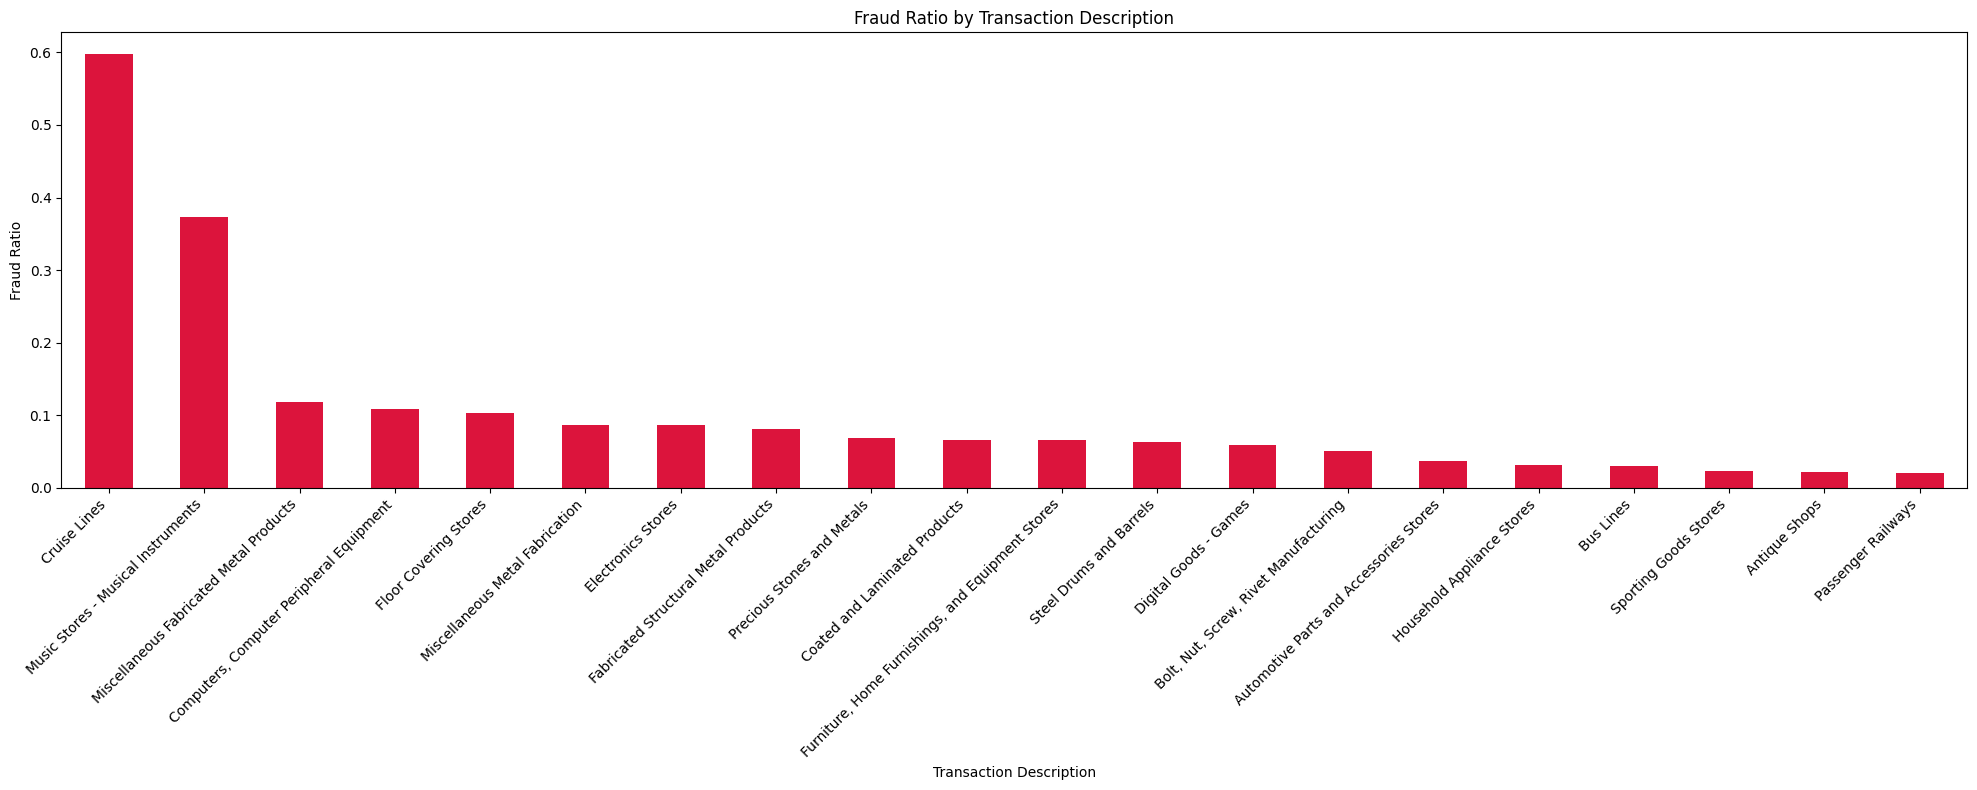

In [47]:
all_counts = final_df.mcc_description.value_counts()
fraud_counts = final_df[final_df.target==1].mcc_description.value_counts()
df =  pd.DataFrame({'Total':all_counts,'Fraud':fraud_counts}).fillna(0)

df['Fraud_Ratio'] = df['Fraud'] / df['Total']
df_top = df.sort_values(by='Fraud_Ratio', ascending=False).head(20)

df_top['Fraud_Ratio'].plot(kind='bar', color='crimson', figsize=(20, 8))
plt.title("Fraud Ratio by Transaction Description")
plt.ylabel("Fraud Ratio")
plt.xlabel("Transaction Description")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

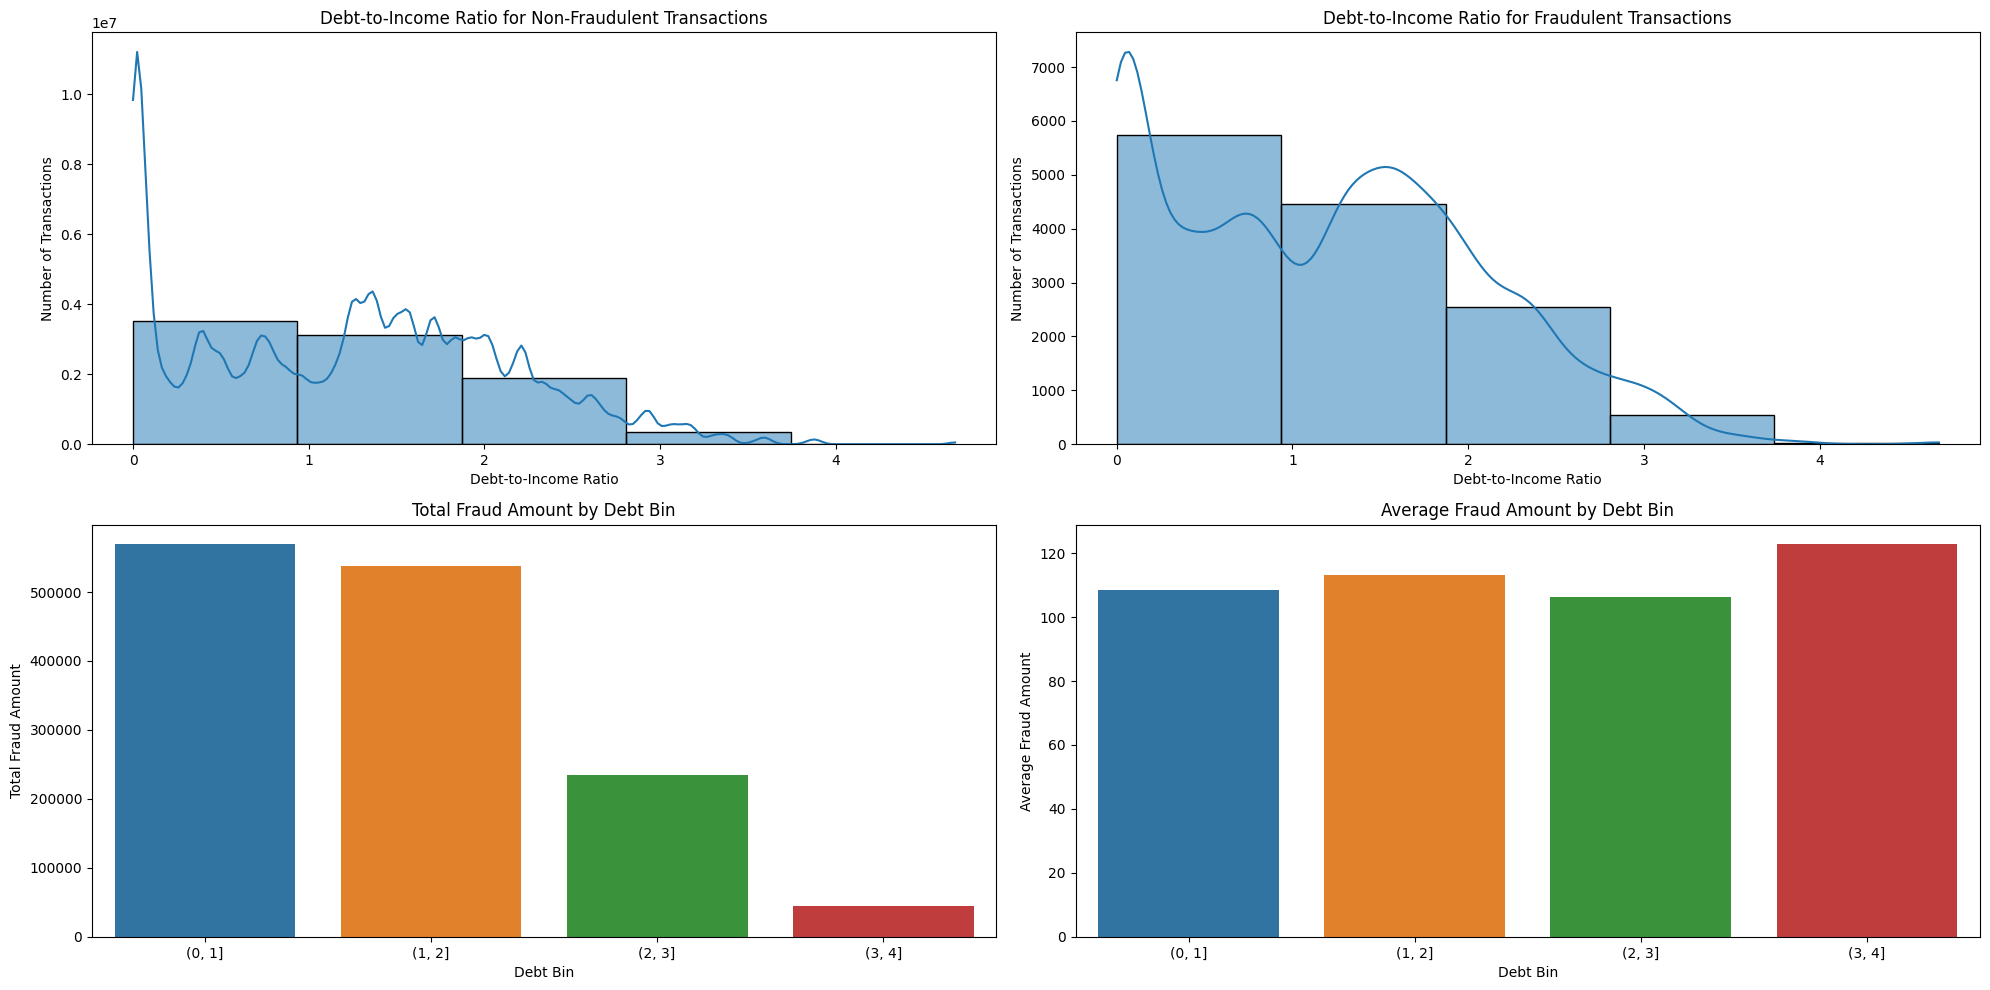

In [48]:
final_df['debt_income_ratio'] = final_df['total_debt']/final_df['yearly_income']
fig, ax = plt.subplots(2,2, figsize = (20,10))

sns.histplot(data=final_df[final_df.target==0], x='debt_income_ratio', bins=5, kde=True, ax=ax[0,0])
ax[0,0].set_title('Debt-to-Income Ratio for Non-Fraudulent Transactions')
ax[0,0].set_xlabel('Debt-to-Income Ratio')
ax[0,0].set_ylabel('Number of Transactions')

sns.histplot(data=final_df[final_df.target==1], x='debt_income_ratio', bins=5, kde=True, ax=ax[0,1])
ax[0,1].set_title('Debt-to-Income Ratio for Fraudulent Transactions')
ax[0,1].set_xlabel('Debt-to-Income Ratio')
ax[0,1].set_ylabel('Number of Transactions')

final_df['debt_bin'] = pd.cut(final_df['debt_income_ratio'], bins=range(0, 5, 1))

sns.barplot(data=final_df[final_df.target==1][['debt_bin', 'amount']].groupby(['debt_bin']).sum().reset_index(), x='debt_bin', y='amount',ax=ax[1,0])
ax[1,0].set_title('Total Fraud Amount by Debt Bin')
ax[1,0].set_xlabel('Debt Bin')
ax[1,0].set_ylabel('Total Fraud Amount')

sns.barplot(data=final_df[final_df.target==1][['debt_bin', 'amount']].groupby(['debt_bin']).mean().reset_index(), x='debt_bin', y='amount',ax=ax[1,1])
ax[1,1].set_title('Average Fraud Amount by Debt Bin')
ax[1,1].set_xlabel('Debt Bin')
ax[1,1].set_ylabel('Average Fraud Amount')

plt.tight_layout()
plt.show()

In [49]:
final_df['time_to_retirement'] = final_df.retirement_age - final_df.current_age

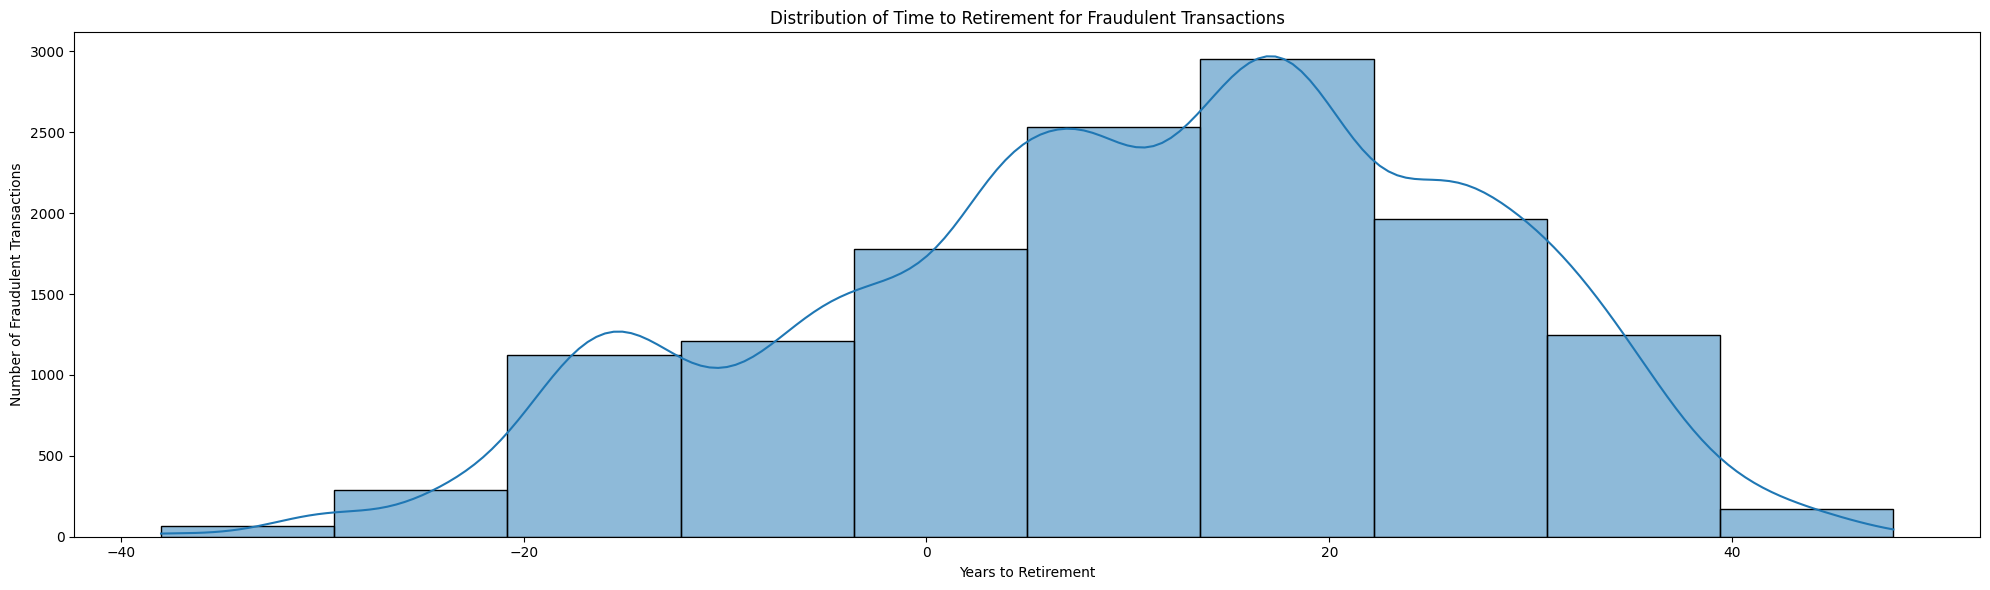

In [50]:
plt.figure(figsize=(20,6))
sns.histplot(data=final_df[final_df.target==1], x='time_to_retirement', bins =10, kde=True)
plt.title('Distribution of Time to Retirement for Fraudulent Transactions')
plt.xlabel('Years to Retirement')
plt.ylabel('Number of Fraudulent Transactions')
plt.tight_layout()
plt.show()

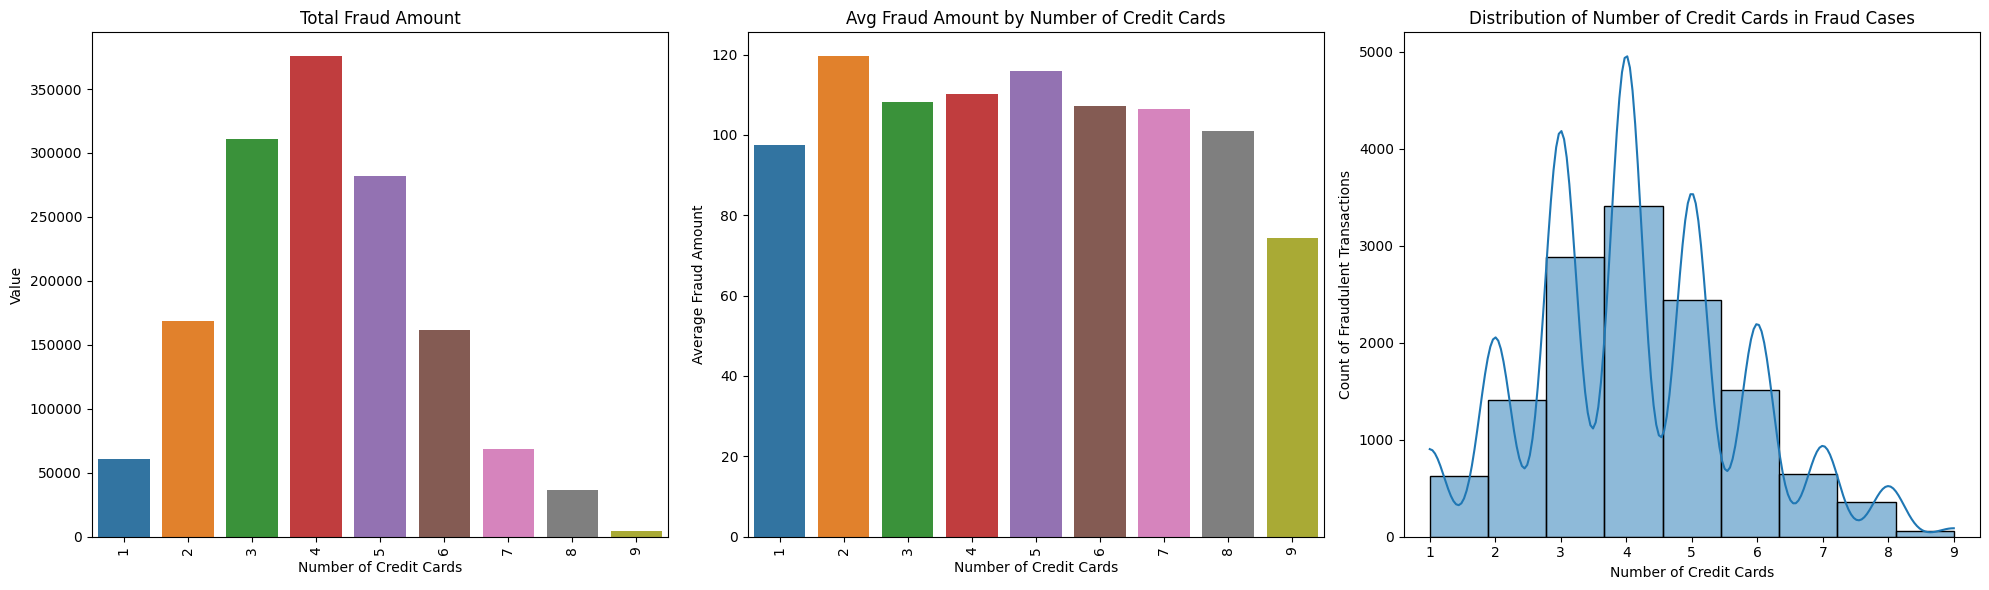

In [51]:
fig, ax = plt.subplots(1,3, figsize = (20,6))
sns.barplot(data=final_df[final_df.target==1][['num_credit_cards', 'amount']].groupby(['num_credit_cards']).sum().reset_index(), x='num_credit_cards', y='amount',ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Total Fraud Amount')
ax[0].set_xlabel('Number of Credit Cards')
ax[0].set_ylabel('Value')

sns.barplot(data=final_df[final_df.target==1][['num_credit_cards', 'amount']].groupby(['num_credit_cards']).mean().reset_index(), x='num_credit_cards', y='amount',ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Avg Fraud Amount by Number of Credit Cards')
ax[1].set_xlabel('Number of Credit Cards')
ax[1].set_ylabel('Average Fraud Amount')

sns.histplot(data=final_df[final_df.target==1], x='num_credit_cards', bins =9, kde=True, ax=ax[2])
ax[2].set_title('Distribution of Number of Credit Cards in Fraud Cases')
ax[2].set_xlabel('Number of Credit Cards')
ax[2].set_ylabel('Count of Fraudulent Transactions')

plt.tight_layout()
plt.show()

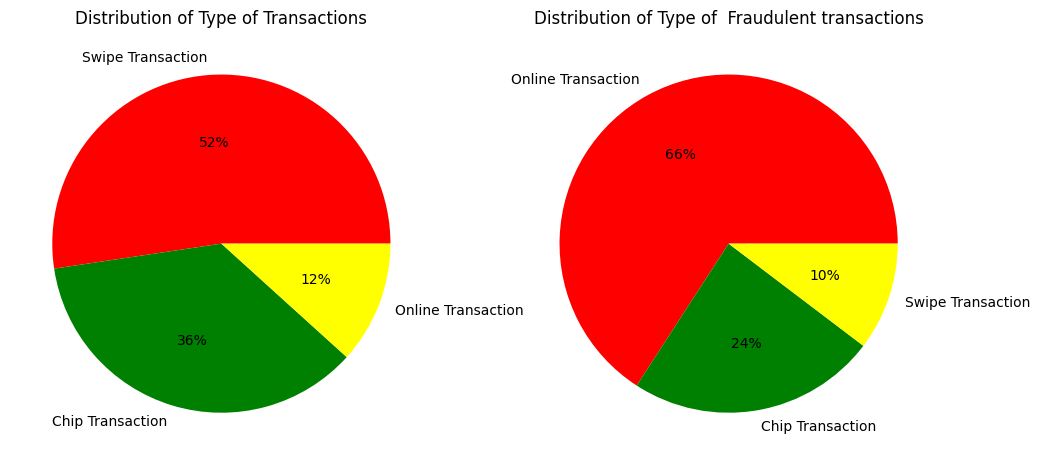

In [52]:
fig,ax = plt.subplots(1,2,figsize=(12,8))
labels = final_df["use_chip"].value_counts().index.tolist()
data = final_df["use_chip"].value_counts().values
ax[0].pie(data,labels = labels,colors=["red","green","yellow"],autopct = "%.0f%%")
ax[0].set_title("Distribution of Type of Transactions")

labels = transaction_fraud_yes["use_chip"].value_counts().index.tolist()
data= transaction_fraud_yes["use_chip"].value_counts().values
ax[1].pie(data,labels = labels,colors=["red","green","yellow"],autopct='%.0f%%')
ax[1].set_title("Distribution of Type of  Fraudulent transactions")

plt.show()



In [53]:
transaction_fraud_yes.columns

Index(['date', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id',
       'merchant_city', 'merchant_state', 'zip', 'mcc', 'errors',
       'transaction_id', 'target', 'card_brand', 'card_type', 'expires',
       'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'mcc_description'],
      dtype='object')

In [54]:
final_df['expires'] = pd.to_datetime(final_df['expires'], format='%m/%Y')
final_df['expiry_year'] = final_df['expires'].dt.year
final_df['expiry_month'] = final_df['expires'].dt.month

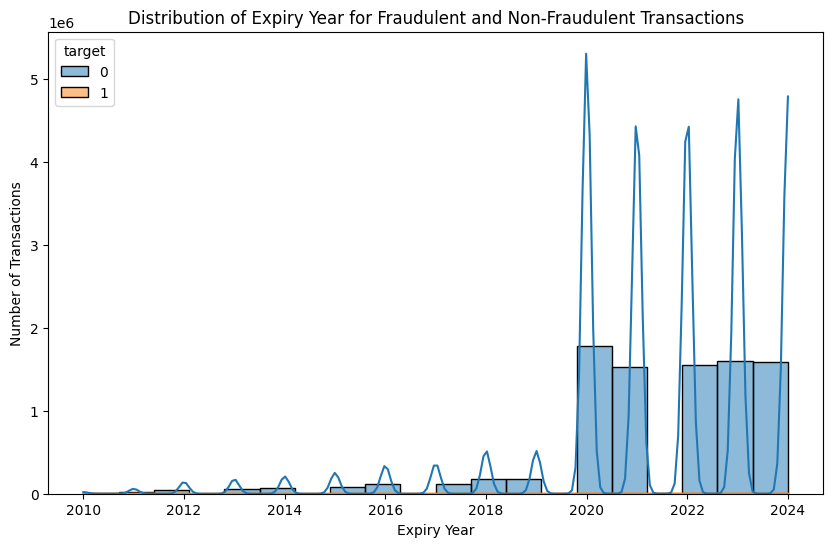

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='expiry_year', hue='target', multiple='stack', bins=20, kde=True)
plt.title('Distribution of Expiry Year for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Expiry Year')
plt.ylabel('Number of Transactions')
plt.show()

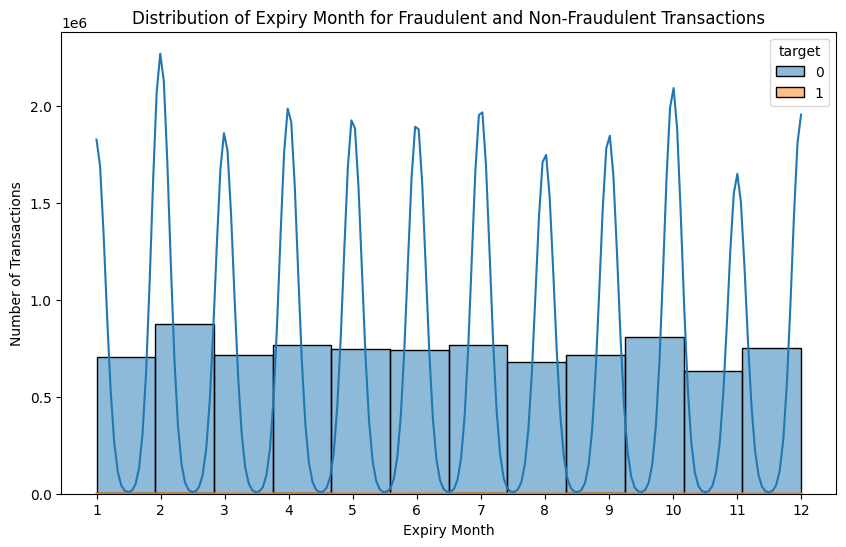

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='expiry_month', hue='target', multiple='stack', bins=12, kde=True)
plt.title('Distribution of Expiry Month for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Expiry Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 13))
plt.show()

In [57]:
final_df['acct_open_date'] = pd.to_datetime(final_df['acct_open_date'], format='%m/%Y')
final_df['acct_open_year'] = final_df['acct_open_date'].dt.year
final_df['acct_open_month'] = final_df['acct_open_date'].dt.month

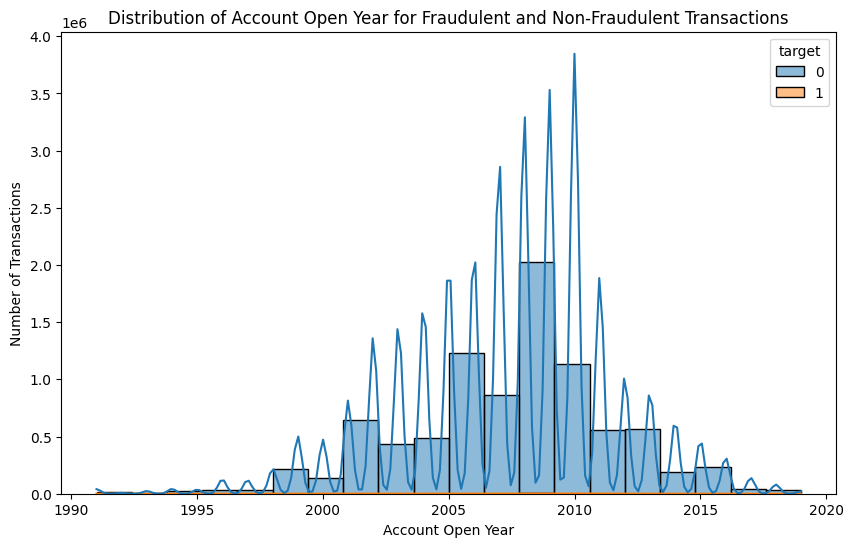

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='acct_open_year', hue='target', multiple='stack', bins=20, kde=True)
plt.title('Distribution of Account Open Year for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Account Open Year')
plt.ylabel('Number of Transactions')
plt.show()

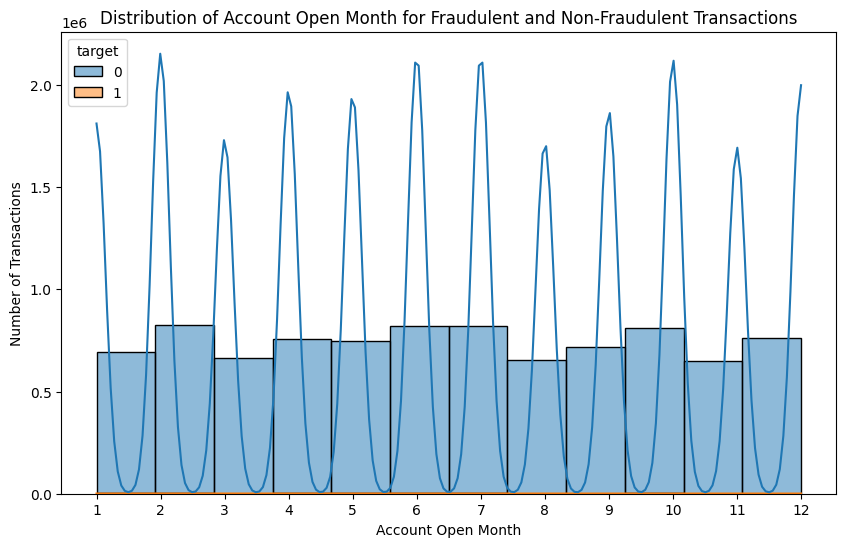

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='acct_open_month', hue='target', multiple='stack', bins=12, kde=True)
plt.title('Distribution of Account Open Month for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Account Open Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 13))
plt.show()

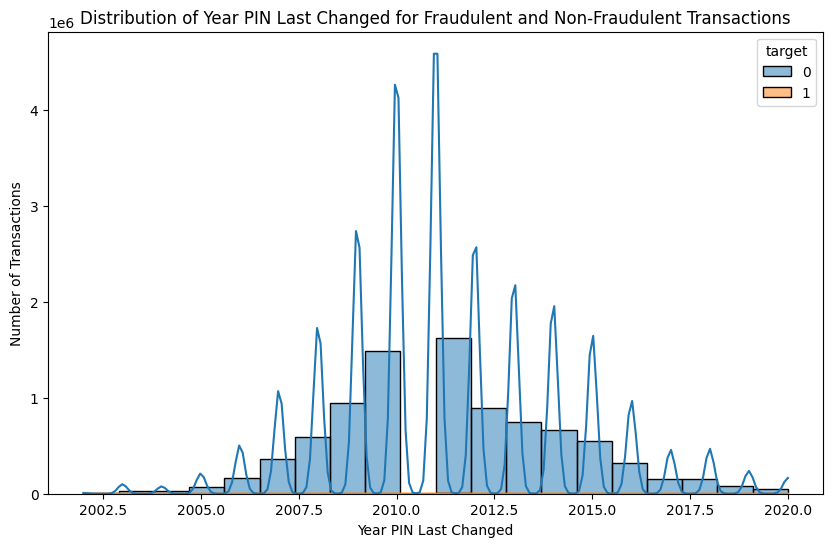

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='year_pin_last_changed', hue='target', multiple='stack', bins=20, kde=True)
plt.title('Distribution of Year PIN Last Changed for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Year PIN Last Changed')
plt.ylabel('Number of Transactions')
plt.show()

In [61]:
final_df["neg_amount"] = np.where(final_df["amount"]<0,'Yes','No')
final_df["transaction_id"] = final_df["transaction_id"].astype(int)

final_df["day"] = final_df["date"].dt.day
final_df['day_name'] = final_df['date'].dt.day_name()
final_df['is_weekend'] = final_df['date'].dt.weekday >= 5
final_df['day_type'] = final_df['is_weekend'].map({True: 'Weekend', False: 'Weekday'})
final_df['hour'] = final_df['date'].dt.hour
final_df.head()


,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,...,expiry_year,expiry_month,acct_open_year,acct_open_month,neg_amount,day,day_name,is_weekend,day_type,hour
0,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,...,2022,7,2008,5,Yes,1,Friday,False,Weekday,0
1,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,...,2024,12,2005,9,No,1,Friday,False,Weekday,0
2,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,...,2020,5,2006,1,No,1,Friday,False,Weekday,0
4,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,...,2020,1,2009,7,No,1,Friday,False,Weekday,0
5,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,...,2014,3,2008,1,No,1,Friday,False,Weekday,0


In [62]:
final_df.columns

Index(['date', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id',
       'merchant_city', 'merchant_state', 'zip', 'mcc', 'errors',
       'transaction_id', 'target', 'card_brand', 'card_type', 'expires',
       'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'mcc_description',
       'debt_income_ratio', 'debt_bin', 'time_to_retirement', 'expiry_year',
       'expiry_month', 'acct_open_year', 'acct_open_month', 'neg_amount',
       'day', 'day_name', 'is_weekend', 'day_type', 'hour'],
      dtype='object')

In [63]:
final_df["transaction_since_acct_open"]=round(
    (
      ((final_df['date'].dt.year-final_df['acct_open_year'])*12)
        + (final_df['date'].dt.month-final_df['acct_open_month'])
    )/12,3
)
final_df["transaction_before_expires"]=round(
    (
      ((final_df["expiry_year"]-final_df["date"].dt.year)*12)
        + (final_df["expiry_month"]-final_df["date"].dt.month)
    )/12,3
)

In [64]:
final_df

,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,...,acct_open_year,acct_open_month,neg_amount,day,day_name,is_weekend,day_type,hour,transaction_since_acct_open,transaction_before_expires
0,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,...,2008,5,Yes,1,Friday,False,Weekday,0,1.667,12.500
1,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,...,2005,9,No,1,Friday,False,Weekday,0,4.333,14.917
2,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,...,2006,1,No,1,Friday,False,Weekday,0,4.000,10.333
4,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,...,2009,7,No,1,Friday,False,Weekday,0,0.500,10.000
5,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,...,2008,1,No,1,Friday,False,Weekday,0,2.000,4.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305905,2019-10-31 23:54:00,672,5001,12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,...,2003,10,No,31,Thursday,False,Weekday,23,16.000,0.250
13305906,2019-10-31 23:54:00,1384,3723,67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,...,2004,7,No,31,Thursday,False,Weekday,23,15.250,0.333
13305910,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,...,2019,3,No,31,Thursday,False,Weekday,23,0.583,0.333
13305911,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,...,2004,3,No,31,Thursday,False,Weekday,23,15.583,4.667


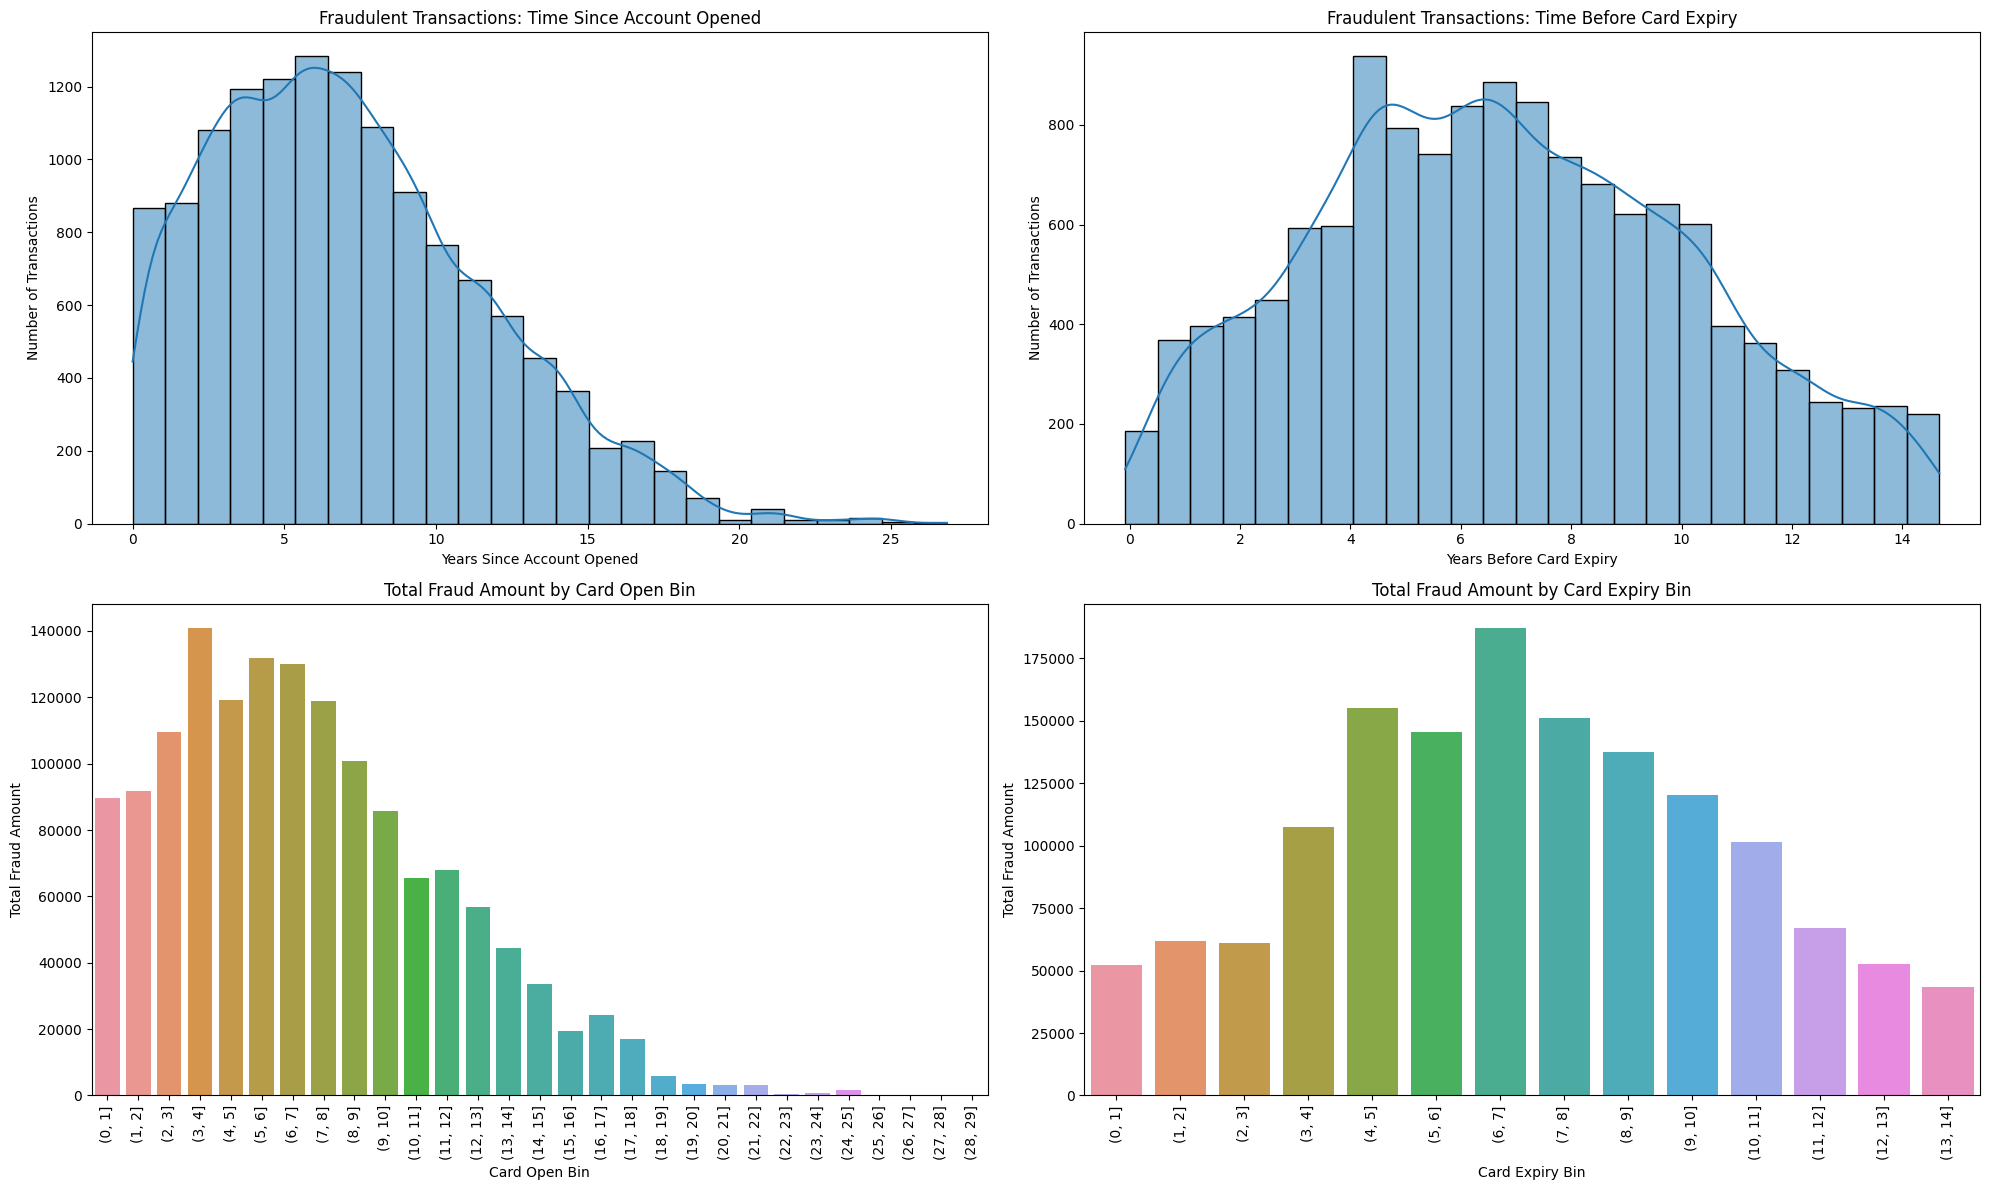

In [65]:
final_df['open_bin'] = pd.cut(final_df['transaction_since_acct_open'], bins=range(0, 30, 1))
final_df['expire_bin'] = pd.cut(final_df['transaction_before_expires'], bins=range(0, 15, 1))

fig, ax = plt.subplots(2,2, figsize = (20,12))

sns.histplot(data=final_df[final_df.target==1], x='transaction_since_acct_open', bins=25, kde=True, ax=ax[0,0])
ax[0,0].set_title('Fraudulent Transactions: Time Since Account Opened')
ax[0,0].set_xlabel('Years Since Account Opened')
ax[0,0].set_ylabel('Number of Transactions')

sns.histplot(data=final_df[final_df.target==1], x='transaction_before_expires', bins=25, kde=True, ax=ax[0,1])
ax[0,1].set_title('Fraudulent Transactions: Time Before Card Expiry')
ax[0,1].set_xlabel('Years Before Card Expiry')
ax[0,1].set_ylabel('Number of Transactions')

sns.barplot(data=final_df[final_df.target==1][['open_bin', 'amount']].groupby(['open_bin']).sum().reset_index(), x='open_bin', y='amount',ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)
ax[1,0].set_title('Total Fraud Amount by Card Open Bin')
ax[1,0].set_xlabel('Card Open Bin')
ax[1,0].set_ylabel('Total Fraud Amount')

sns.barplot(data=final_df[final_df.target==1][['expire_bin', 'amount']].groupby(['expire_bin']).sum().reset_index(), x='expire_bin', y='amount',ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)
ax[1,1].set_title('Total Fraud Amount by Card Expiry Bin')
ax[1,1].set_xlabel('Card Expiry Bin')
ax[1,1].set_ylabel('Total Fraud Amount')

plt.tight_layout()
plt.show()

In [66]:
final_df["ones"]=1
final_df["update_amt"] = np.where(final_df.neg_amount=='Yes',final_df["amount"]*-1,final_df.amount)

In [67]:
client_card_df = final_df[["client_id","card_id",'target','update_amt']].groupby(['client_id','card_id'
,'target']).agg(
    mean_amount=('update_amt','mean'),
    max_amount = ('update_amt','max'),
    min_amount = ('update_amt','min'),
    count = ('update_amt','count'),
    total_amount = ('update_amt','sum')
    ).reset_index()


In [68]:

client_card_df.head(10)

,client_id,card_id,target,mean_amount,max_amount,min_amount,count,total_amount
0,0,1271,0,45.904068,577.46,0.65,4621,212122.70
1,0,1271,1,30.260000,45.48,15.04,2,60.52
2,0,4639,0,80.186643,1128.47,0.78,4019,322270.12
3,0,4639,1,70.697500,129.40,5.13,4,282.79
4,1,3682,0,39.487578,542.66,0.54,1148,45331.74
5,1,4400,0,28.753644,634.41,0.27,2083,59893.84
6,1,4400,1,174.560000,286.39,2.20,3,523.68
7,1,4652,0,40.217440,937.15,0.58,3520,141565.39
8,1,4652,1,116.164000,367.00,9.04,10,1161.64
9,2,2576,0,30.642085,349.03,0.08,2667,81722.44
